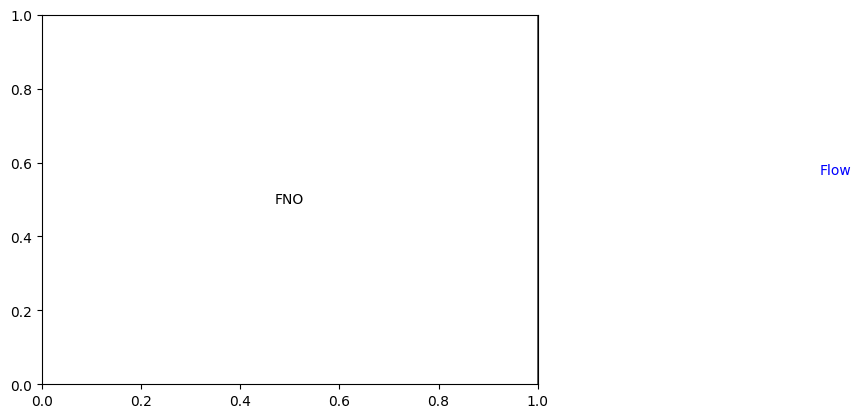

In [ ]:
from cm_vis.scheme import FlowScheme
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fs = FlowScheme(ax)

fs.add_cube(origin=[0, 0], text="FNO", front_color="white", side_color="gray", top_color="lightblue")
fs.add_arrow("-latex", xy=[[1.2, 0.5], [2.0, 0.5]], fc="black")
fs.add_text(1.6, 0.55, "Flow", loc="upper", textc="blue")